In [1]:
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [2]:
def nlfunction(x):
    return (x**3 + 2*x**2 + 3*x + 1)

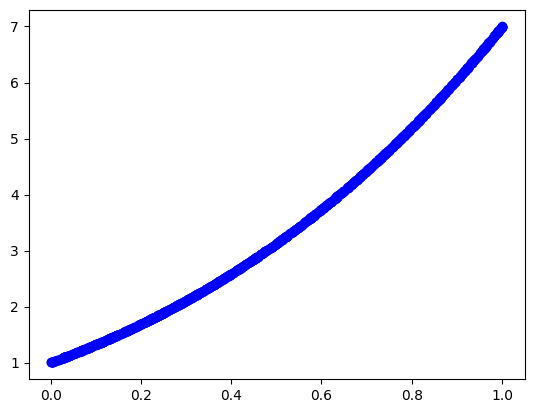

In [3]:
X = torch.rand((1000, 1))
Y = nlfunction(X)
plt.plot(X,Y,'bo')

In [4]:
class firstModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 250)
        self.fc2 = nn.Linear(250, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

In [5]:
class secondModel(nn.Module):
   def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 60)
        self.fc2 = nn.Linear(60, 40)
        self.fc3 = nn.Linear(40, 20)
        self.fc4 = nn.Linear(20, 1)
   def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val

In [6]:
class thirdModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 40)
        self.fc3 = nn.Linear(40, 30)
        self.fc4 = nn.Linear(30, 20)
        self.fc5 = nn.Linear(20, 10)
        self.fc6 = nn.Linear(10, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val

In [7]:
mdl1 = firstModel()
summary(mdl1,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 250]             500
            Linear-2                    [-1, 1]             251
Total params: 751
Trainable params: 751
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [8]:
mdl2 = secondModel()
summary(mdl2,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 60]             120
            Linear-2                   [-1, 40]           2,440
            Linear-3                   [-1, 20]             820
            Linear-4                    [-1, 1]              21
Total params: 3,401
Trainable params: 3,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [9]:
mdl3 = thirdModel()
summary(mdl3,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]             100
            Linear-2                   [-1, 40]           2,040
            Linear-3                   [-1, 30]           1,230
            Linear-4                   [-1, 20]             620
            Linear-5                   [-1, 10]             210
            Linear-6                    [-1, 1]              11
Total params: 4,211
Trainable params: 4,211
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [10]:
lossFunc = nn.MSELoss()

In [11]:
mdl4 = firstModel()
mdl5 = secondModel()
mdl6 = thirdModel()
model4inOpt = optim.SGD(mdl4.parameters(), lr=0.001)
model5inOpt = optim.SGD(mdl5.parameters(), lr=0.001)
model6inOpt = optim.SGD(mdl6.parameters(),lr = 0.001)

In [12]:
model1inOpt = optim.SGD(mdl1.parameters(), lr=0.001)
model2inOpt = optim.SGD(mdl2.parameters(), lr=0.001)
model3inOpt = optim.SGD(mdl3.parameters(),lr = 0.001)
EPOCHS = 1000
model1Cost = []
for index in range(EPOCHS):
    output = mdl1.forward(X)
    cost = lossFunc(output, Y)
    cost.backward()
    model1inOpt.step()
    mdl1.zero_grad()
    model1Cost.append(cost.detach().numpy())
    if(index+1)%100 == 0:
      print(f'epoch - {index+1} : loss - {cost.item(): .3f}')


epoch - 100 : loss -  0.754
epoch - 200 : loss -  0.340
epoch - 300 : loss -  0.169
epoch - 400 : loss -  0.098
epoch - 500 : loss -  0.069
epoch - 600 : loss -  0.057
epoch - 700 : loss -  0.051
epoch - 800 : loss -  0.048
epoch - 900 : loss -  0.047
epoch - 1000 : loss -  0.045


In [13]:
model2Cost = []
for index in range(EPOCHS):
    mdl2.zero_grad()
    output = mdl2(X)
    cost = lossFunc(output, Y)
    model2Cost.append(cost.detach().numpy())
    cost.backward()
    model2inOpt.step()
    if(index+1)%100 == 0:
      print(f'epoch - {index+1} : loss - {cost.item(): .3f}')

epoch - 100 : loss -  3.833
epoch - 200 : loss -  1.546
epoch - 300 : loss -  1.075
epoch - 400 : loss -  0.655
epoch - 500 : loss -  0.345
epoch - 600 : loss -  0.174
epoch - 700 : loss -  0.101
epoch - 800 : loss -  0.071
epoch - 900 : loss -  0.058
epoch - 1000 : loss -  0.050


In [14]:
model3Cost = []

for index in range(EPOCHS):
    mdl3.zero_grad()
    output = mdl3(X)
    cost = lossFunc(output, Y)
    model3Cost.append(cost.detach().numpy())
    cost.backward()
    model3inOpt.step()
    if(index+1)%100 == 0:
      print(f'epoch - {index+1} : loss - {cost.item(): .3f}')

epoch - 100 : loss -  11.159
epoch - 200 : loss -  6.990
epoch - 300 : loss -  2.942
epoch - 400 : loss -  2.155
epoch - 500 : loss -  1.737
epoch - 600 : loss -  1.205
epoch - 700 : loss -  0.656
epoch - 800 : loss -  0.260
epoch - 900 : loss -  0.102
epoch - 1000 : loss -  0.051


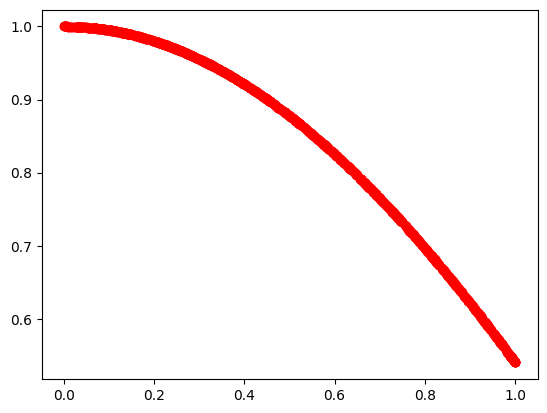

In [15]:
Y1 = torch.cos(X)
plt.plot(X,Y1,'ro')

In [16]:
EPOCHS = 1000
model4Cost = []
for index in range(EPOCHS):
    mdl4.zero_grad()
    output = mdl4(X)
    cost = lossFunc(output, Y1)
    model4Cost.append(cost.detach().numpy())
    cost.backward()
    model4inOpt.step()
    if(index+1)%100 == 0:
      print(f'epoch - {index+1} : loss - {cost.item(): .3f}')


model5Cost = []

for index in range(EPOCHS):
    mdl5.zero_grad()
    output = mdl5(X)
    cost = lossFunc(output, Y1)
    model5Cost.append(cost.detach().numpy())
    cost.backward()
    model5inOpt.step()
    if(index+1)%100 == 0:
      print(f'epoch - {index+1} : loss - {cost.item(): .3f}')


model6Cost = []

for index in range(EPOCHS):
    mdl6.zero_grad()
    output = mdl6(X)
    cost = lossFunc(output, Y1)
    model6Cost.append(cost.detach().numpy())
    cost.backward()
    model6inOpt.step()
    if(index+1)%100 == 0:
      print(f'epoch - {index+1} : loss - {cost.item(): .3f}')

epoch - 100 : loss -  0.010
epoch - 200 : loss -  0.005
epoch - 300 : loss -  0.003
epoch - 400 : loss -  0.003
epoch - 500 : loss -  0.003
epoch - 600 : loss -  0.003
epoch - 700 : loss -  0.002
epoch - 800 : loss -  0.002
epoch - 900 : loss -  0.002
epoch - 1000 : loss -  0.002
epoch - 100 : loss -  0.397
epoch - 200 : loss -  0.192
epoch - 300 : loss -  0.088
epoch - 400 : loss -  0.045
epoch - 500 : loss -  0.030
epoch - 600 : loss -  0.025
epoch - 700 : loss -  0.023
epoch - 800 : loss -  0.022
epoch - 900 : loss -  0.020
epoch - 1000 : loss -  0.019
epoch - 100 : loss -  0.219
epoch - 200 : loss -  0.130
epoch - 300 : loss -  0.080
epoch - 400 : loss -  0.053
epoch - 500 : loss -  0.037
epoch - 600 : loss -  0.029
epoch - 700 : loss -  0.025
epoch - 800 : loss -  0.023
epoch - 900 : loss -  0.022
epoch - 1000 : loss -  0.021


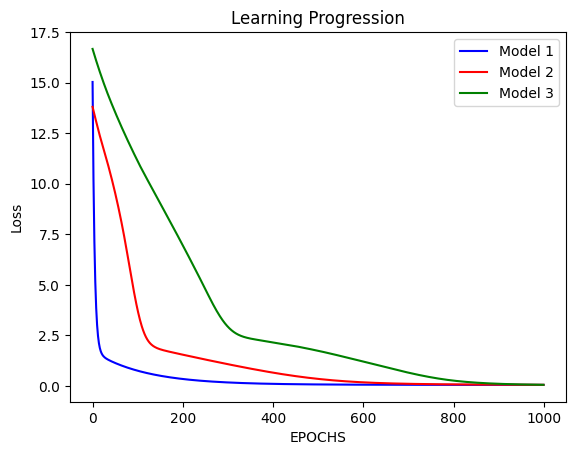

In [17]:
plt.plot(range(EPOCHS), model1Cost, 'b', label='Model 1')
plt.plot(range(EPOCHS), model2Cost, 'r', label='Model 2')
plt.plot(range(EPOCHS), model3Cost, 'g', label='Model 3')
plt.title("Learning Progression")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()

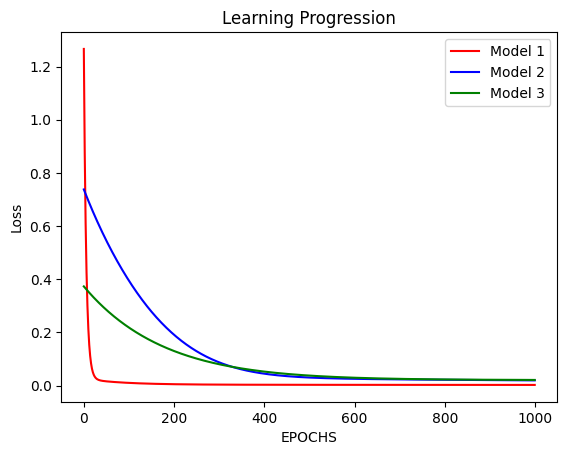

In [18]:
plt.plot(range(EPOCHS), model4Cost, 'r', label='Model 1')
plt.plot(range(EPOCHS), model5Cost, 'b', label='Model 2')
plt.plot(range(EPOCHS), model6Cost, 'g', label='Model 3')
plt.title("Learning Progression")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()

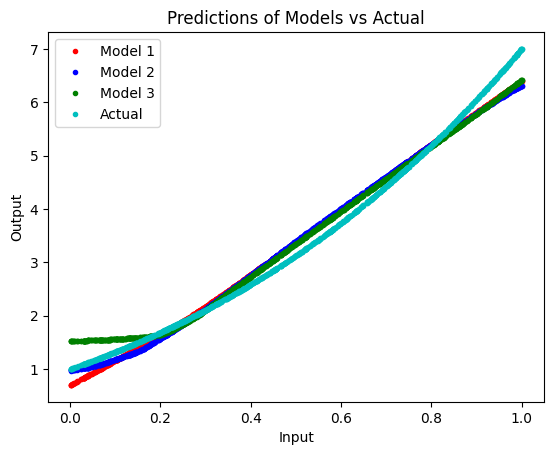

In [19]:
model1_pred = mdl1(X)
model2_pred = mdl2(X)
model3_pred = mdl3(X)

plt.plot(X.tolist(), model1_pred.tolist(), 'r.', label='Model 1')
plt.plot(X.tolist(), model2_pred.tolist(), 'b.', label='Model 2')
plt.plot(X.tolist(), model3_pred.tolist(), 'g.', label='Model 3')
plt.plot(X, Y.tolist(), 'c.', label='Actual')
plt.title("Predictions of Models vs Actual")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

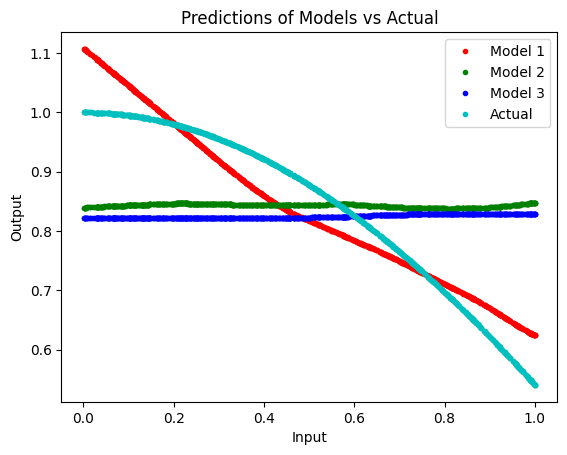

In [20]:
model4_pred = mdl4(X)
model5_pred = mdl5(X)
model6_pred = mdl6(X)

plt.plot(X.tolist(), model4_pred.tolist(), 'r.', label='Model 1')
plt.plot(X.tolist(), model5_pred.tolist(), 'g.', label='Model 2')
plt.plot(X.tolist(), model6_pred.tolist(), 'b.', label='Model 3')
plt.plot(X, Y1.tolist(), 'c.', label='Actual')
plt.title("Predictions of Models vs Actual")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()